In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Menuka\\Desktop\\My projects\\data\\diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# checking duplicates
df.duplicated().sum()

np.int64(3854)

In [4]:
df.shape

(100000, 9)

In [5]:
df = df.drop_duplicates()
df.shape

(96146, 9)

In [6]:
# checking missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [8]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [9]:
# checking data types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
# train test splitting
from sklearn.model_selection import train_test_split
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((76916, 8), (19230, 8))

### Peform explanatory data analysis with train data

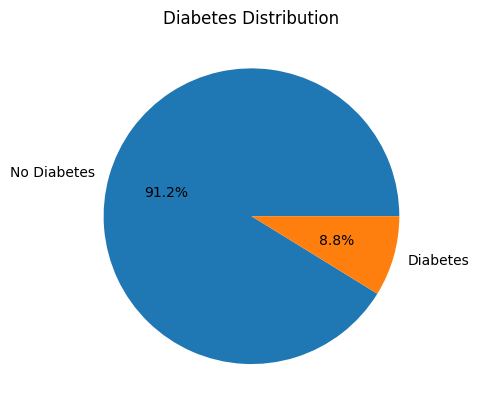

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(y_train.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

The response variable is perform class imbalanced, so we need to take into account in advanced analysis process.

In [12]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

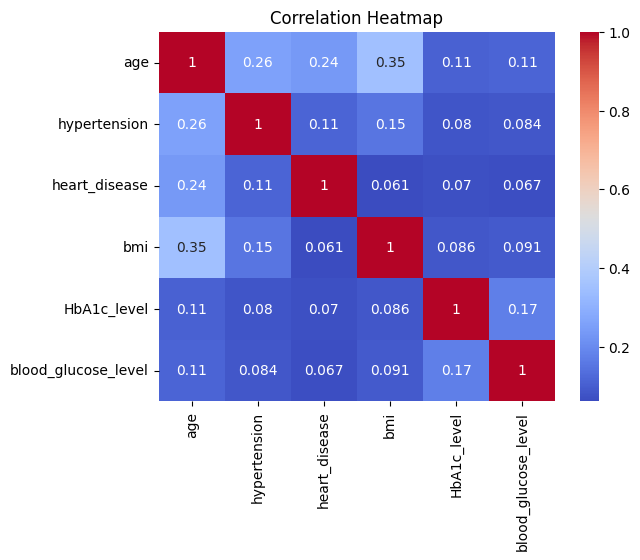

In [13]:
num_cols = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']
sns.heatmap(X_train[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Not perform severe multicolinearity between numerical predictor variables.

In [14]:
pip install prince

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import prince
FAMD = prince.FAMD(n_components=5)
FAMD_Data = FAMD.fit_transform(X_train)
display(FAMD_Data.head())



component,0,1,2,3,4
46612,-1.129711,-0.846032,0.544361,-0.352606,-1.232911
31612,-2.467349,-0.496225,0.453831,1.546531,1.240311
96143,0.075111,-0.553576,-3.612451,0.912532,-3.523422
95691,0.321864,0.182585,0.691472,0.974070,1.193173
37658,-0.081498,-0.835056,2.178855,1.732260,-1.930561


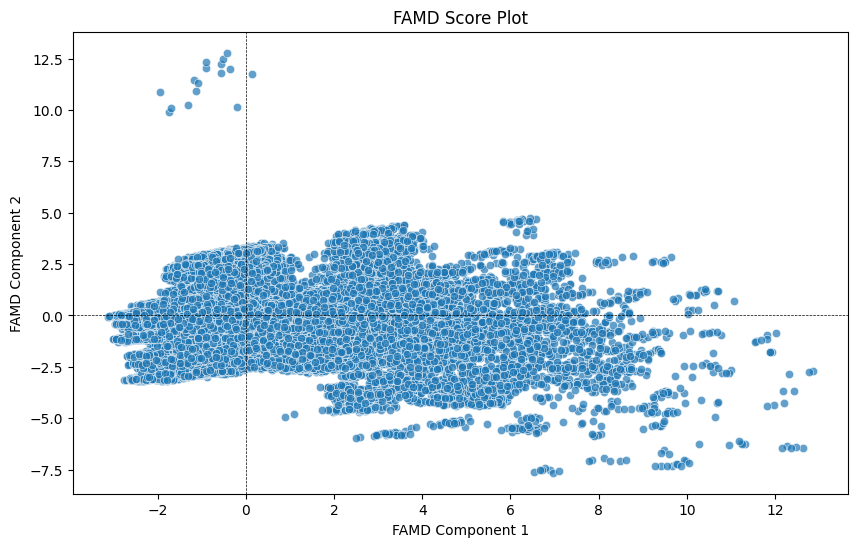

In [16]:
# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=FAMD_Data.iloc[:, 0], y=FAMD_Data.iloc[:, 1], alpha=0.7)

plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.show()

According to factor analysis for mixed data we could not detect any clusters here. to make sence that i decided to perform silhoutte method below.

In [17]:
# apply encoding - label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['smoking_history'] = le.fit_transform(X_train['smoking_history'])
X_train.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,0,35.0,0,0,0,31.53,6.6,155
31612,0,0.4,0,0,0,15.19,4.0,130
96143,0,60.0,0,0,2,20.90,6.5,100
95691,1,66.0,0,0,4,27.05,6.0,130
37658,1,48.0,0,0,5,24.05,4.8,145


Handle class imbalnced

In [18]:
# reduce class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the standardized data
# Set n_neighbors to a value less than or equal to the minimum number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=5)
x_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)


print("Shape of original c1_x_train:", X_train.shape)
print("Shape of c1_y_train:",y_train.shape)
print("Shape of c1_x_train after scaling and SMOTE:", x_train_smote.shape)
print("Shape of c1_y_train after scaling and SMOTE:", y_train_smote.shape)
print("\nValue counts of original c1_y_train:")
print(y_train.value_counts())
print("\nValue counts of c1_y_train after SMOTE:")
print(y_train_smote.value_counts())

Shape of original c1_x_train: (76916, 8)
Shape of c1_y_train: (76916,)
Shape of c1_x_train after scaling and SMOTE: (140310, 8)
Shape of c1_y_train after scaling and SMOTE: (140310,)

Value counts of original c1_y_train:
diabetes
0    70155
1     6761
Name: count, dtype: int64

Value counts of c1_y_train after SMOTE:
diabetes
0    70155
1    70155
Name: count, dtype: int64


In [19]:
# apply scalling - Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.842551,-0.301980,-0.288976,-0.20548,-1.184402,0.624051,0.994649,0.412328
1,-0.842551,-1.842405,-0.288976,-0.20548,-1.184402,-1.789284,-1.428149,-0.198580
2,-0.842551,0.811043,-0.288976,-0.20548,-0.120243,-0.945946,0.901465,-0.931669
3,1.184843,1.078169,-0.288976,-0.20548,0.943916,-0.037623,0.435542,-0.198580
4,1.184843,0.276792,-0.288976,-0.20548,1.475995,-0.480707,-0.682673,0.167965


Applying same preprocessing for test data

In [20]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,Female,5.0,0,0,No Info,15.14,4.5,90
34774,Male,19.0,0,0,never,22.74,6.6,85
71084,Female,52.0,0,0,never,24.27,7.5,220
50584,Male,55.0,0,0,No Info,27.32,5.7,85
80788,Female,22.0,0,0,never,28.78,4.5,200


In [21]:
X_test['gender'] = le.fit_transform(X_test['gender'])
X_test['smoking_history'] = le.fit_transform(X_test['smoking_history'])
X_test.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,0,5.0,0,0,0,15.14,4.5,90
34774,1,19.0,0,0,4,22.74,6.6,85
71084,0,52.0,0,0,4,24.27,7.5,220
50584,1,55.0,0,0,0,27.32,5.7,85
80788,0,22.0,0,0,4,28.78,4.5,200


In [22]:
X_test_scaled = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.84710,-1.639615,-0.294321,-0.209294,-1.196552,-1.813199,-0.961862,-1.189220
1,1.17949,-1.016528,-0.294321,-0.209294,0.928907,-0.688126,0.994219,-1.311604
2,-0.84710,0.452179,-0.294321,-0.209294,0.928907,-0.461631,1.832539,1.992771
3,1.17949,0.585698,-0.294321,-0.209294,-1.196552,-0.010122,0.155898,-1.311604
4,-0.84710,-0.883009,-0.294321,-0.209294,0.928907,0.206011,-0.961862,1.503234


### Fitting a machine learning model for SMOTE data ( after handling class imbalaned

decision Tree Classifier


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  # Optional: good if some classes are rare
)
dt.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = dt.predict(x_train_smote)
y_test_pred = dt.predict(X_test)

# Evaluate on Training Data
print("📊 Confusion Matrix (Train):")
print(confusion_matrix(y_train_smote, y_train_pred))

print("\n📊 Classification Report (Train):")
print(classification_report(y_train_smote, y_train_pred))

# Evaluate on Test Data
print("\n📊 Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

📊 Confusion Matrix (Train):
[[70152     3]
 [   47 70108]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70155
           1       1.00      1.00      1.00     70155

    accuracy                           1.00    140310
   macro avg       1.00      1.00      1.00    140310
weighted avg       1.00      1.00      1.00    140310


📊 Confusion Matrix (Test):
[[17509     0]
 [ 1721     0]]

📊 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17509
           1       0.00      0.00      0.00      1721

    accuracy                           0.91     19230
   macro avg       0.46      0.50      0.48     19230
weighted avg       0.83      0.91      0.87     19230



c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

random forest

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Optional: good if some classes are rare
)
rf.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = rf.predict(x_train_smote)
y_test_pred = rf.predict(X_test)

# Evaluate on Training Data
print("📊 Confusion Matrix (Train):")
print(confusion_matrix(y_train_smote, y_train_pred))

print("\n📊 Classification Report (Train):")
print(classification_report(y_train_smote, y_train_pred))

# Evaluate on Test Data
print("\n📊 Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

📊 Confusion Matrix (Train):
[[70139    16]
 [   34 70121]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70155
           1       1.00      1.00      1.00     70155

    accuracy                           1.00    140310
   macro avg       1.00      1.00      1.00    140310
weighted avg       1.00      1.00      1.00    140310


📊 Confusion Matrix (Test):
[[17509     0]
 [ 1721     0]]

📊 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17509
           1       0.00      0.00      0.00      1721

    accuracy                           0.91     19230
   macro avg       0.46      0.50      0.48     19230
weighted avg       0.83      0.91      0.87     19230



c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Menuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

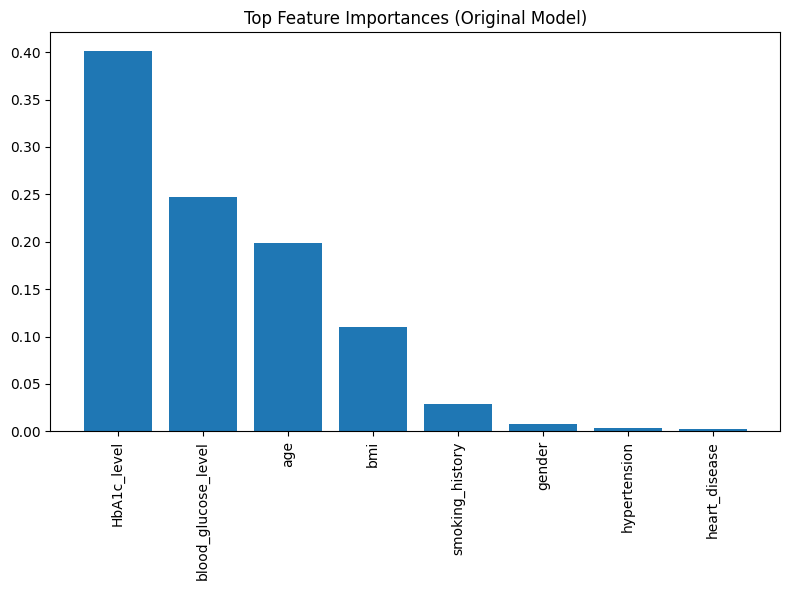

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns  # Assumes X_train is a DataFrame

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.title("Top Feature Importances (Original Model)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Model deplyment

In [26]:
import pickle
with open ('model_pickle','wb') as f :
    pickle.dump(rf,f)